<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%206%EC%9D%BC/12%EC%9B%94_6%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
- 이제까지 binary classfication(이진 분류)를 다뤘다면
- 오늘은 여러 개의 t값에 대한 multinomial classfication(다중 분류)!!

In [ ]:
# 총 3가지 예제에 대해서 해볼 거에요!
# 첫 번째로는 BMI 데이터를 가지고 진행할거에요!
# tensorflow, sklearn 둘 다 구현할 예정

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from re import X
# Raw Data Loading
# 평소 읽어오던 대로 하면 paerseerror 발생!
# why? data를 보면 첫 3줄이 주석으로 데이터에 대한 설명으로 되어있으므로 오류 발생
# skiprows를 사용하여 건너뛰고 읽어오기 가능!
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/bmi.csv',skiprows=3)
df

# 결측치가 있는 지 확인!
df.isnull().sum()

# 이상치 확인
zscore = 1.8
df.loc[np.abs(stats.zscore(df['height']))>zscore]
df.loc[np.abs(stats.zscore(df['weight']))>zscore]
df.loc[np.abs(stats.zscore(df['label']))>zscore]

# 데이터 분리
x_data = df[['height','weight']].values  # 2차원 배열
t_data = df['label']  # 1차원
t_data

# 정규화 진행!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [ ]:
# sklearn으로 먼저 구현해 볼거에요!
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)

# 평가는 accuracy로 할거에요!
score = accuracy_score(t_data_test, predict_value)  #(정답, 예측값)의 순서로 넣어줘야함(1차원 배열)
score

# prediction을 예측해보아요!
height = 187
weight = 80
my_state = np.array([[height,weight]])
my_result = sklearn_model.predict(scaler.transform(my_state))
my_result

array([1])

In [ ]:
# Tensorflow로 구현해보아요!
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss = 'sparse_categorical_crossentropy',   # sparse -> keras에게 알아서 원핫인코딩 처리해서 계산하라는 의미
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose=1,
                validation_split=0.2)
# loss: 0.0637 - acc: 0.9821 - val_loss: 0.0545 - val_acc: 0.9868

In [ ]:
# 평가를 진행!
keras_eval = keras_model.evaluate(x_data_test_norm,
                     t_data_test)
keras_eval

height = 187
weight = 80
my_state = np.array([[height,weight]])
my_result = keras_model.predict(scaler.transform(my_state))
my_result

1/1 [==============================] - 0s 73ms/step


array([[2.3728067e-07, 9.9124616e-01, 8.7536369e-03]], dtype=float32)

In [ ]:
# 다른 예제를 구현해보아요!(iris - 붓꽃예제, MNIST - 손글씨 숫자 예제)
# 대표적인 예제들(MNIST -> 비전 쪽 대표 예제이므로 잘 배우자!)
# 지금까지 evaluation 할 때, accuracy만 사용했어요
# 그런데 사실 precision,recall,f1과 같은 평가지도 많이 사용되요!
# 이런 평가지표를 한방에 계산해주는 함수(library)가 있어요
# 예제를 통해 알아보아요!

from sklearn.metrics import classification_report
t_true = [0,1,2,2,2]
t_pred = [0,0,2,2,1]

label_names = ['thin','normal','fat']
print(classification_report(t_true, t_pred, target_names=label_names))
# classification_report(정답, 예측값)의 형태로 사용해야 한다
# support는 대상의 개수

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
# 두 번째 예제는 iris(붓꽃) 데이터에요!
# 아주 유명한 데이터 셋
# 3가지 종류 -> setosa, versicolor, verginica
# 붓꽃의 꽃받침과 꽃잎의 길이와 너비에 따라 품종이 결정!

# 데이터는 총 150개의 데이터가 있어요!
# 꽃받침(sepal), 꽃잎(petal)

# 필요 module import
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns=['sepal_length','sepal_width','petal_length','petal_width']

# target 컬럼 추가
df['target'] = iris.target
# 결측치 확인
df.isnull().sum()

# 중복행이 있을 수 있어요! 중복 데이터가 있을 수 있어요!
# 중복된 데이터가 있다고 해서 무조건 제거 금지!!
df.duplicated().sum()  # 중복된 값이 있으면 숫자로 알려줌 / 0이면 중복된 값 없다는 의미
df = df.drop_duplicates()
df

# 데이터 셋 분류
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target']

# 이상치 체크도 해야해요! 원래는 해야해요!
# but, 이 데이터는 실제 데이터이므로 skip!
# 정규화 처리를 해야해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 학습, 테스트 데이터 분류
x_data_train_norm, x_data_test_norm, t_data_train, t_date_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

In [ ]:
# 데이터가 준비 되었으면 학습을 해야겠죠!
# 우리 Tensorflow Keras를 이용해서
# Multinomial Classification을 구현하고
# 모델 평가까지 진행해보아요!
# 정확도까지 출력

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

history = keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=500,
                verbose=1,
                validation_split=0.2)
# loss: 0.0853 - acc: 0.9518 - val_loss: 0.0280 - val_acc: 1.0000

Epoch 1/500
3/3 [==============================] - 59s 29s/step - loss: 1.0481 - acc: 0.6627 - val_loss: 0.9586 - val_acc: 0.6190
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.8598 - acc: 0.6265 - val_loss: 0.8892 - val_acc: 0.5238
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 0.7810 - acc: 0.7349 - val_loss: 0.8004 - val_acc: 0.6667
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7020 - acc: 0.8072 - val_loss: 0.7075 - val_acc: 0.6190
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.6162 - acc: 0.7590 - val_loss: 0.6125 - val_acc: 0.7143
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 0.5587 - acc: 0.8313 - val_loss: 0.5461 - val_acc: 0.8571
Epoch 7/500
3/3 [==============================] - 0s 16ms/step - loss: 0.5191 - acc: 0.8795 - val_loss: 0.5041 - val_acc: 0.8571
Epoch 8/500
3/3 [==============================] - 0s 20ms/step - loss: 0.4885 - acc: 0.86

In [ ]:
# 모델 평가(evaluation)
keras_model.evaluate(x_data_test_norm,
                     t_data_test)

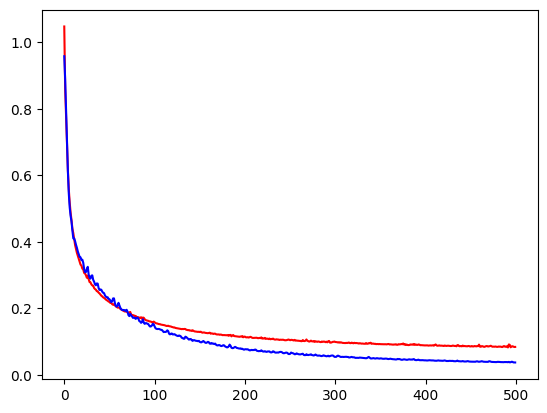

In [ ]:
# 시각화를 해보아요!
# 우리 모델이 overfitting이 발생하는지 그래프로 확인!
# history 객체가 가지고 있는 history 속성은 학습할 때 나온 데이터를 가지고 있어요
# dict로 가지고 있어요!

history.history.keys()

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.show()